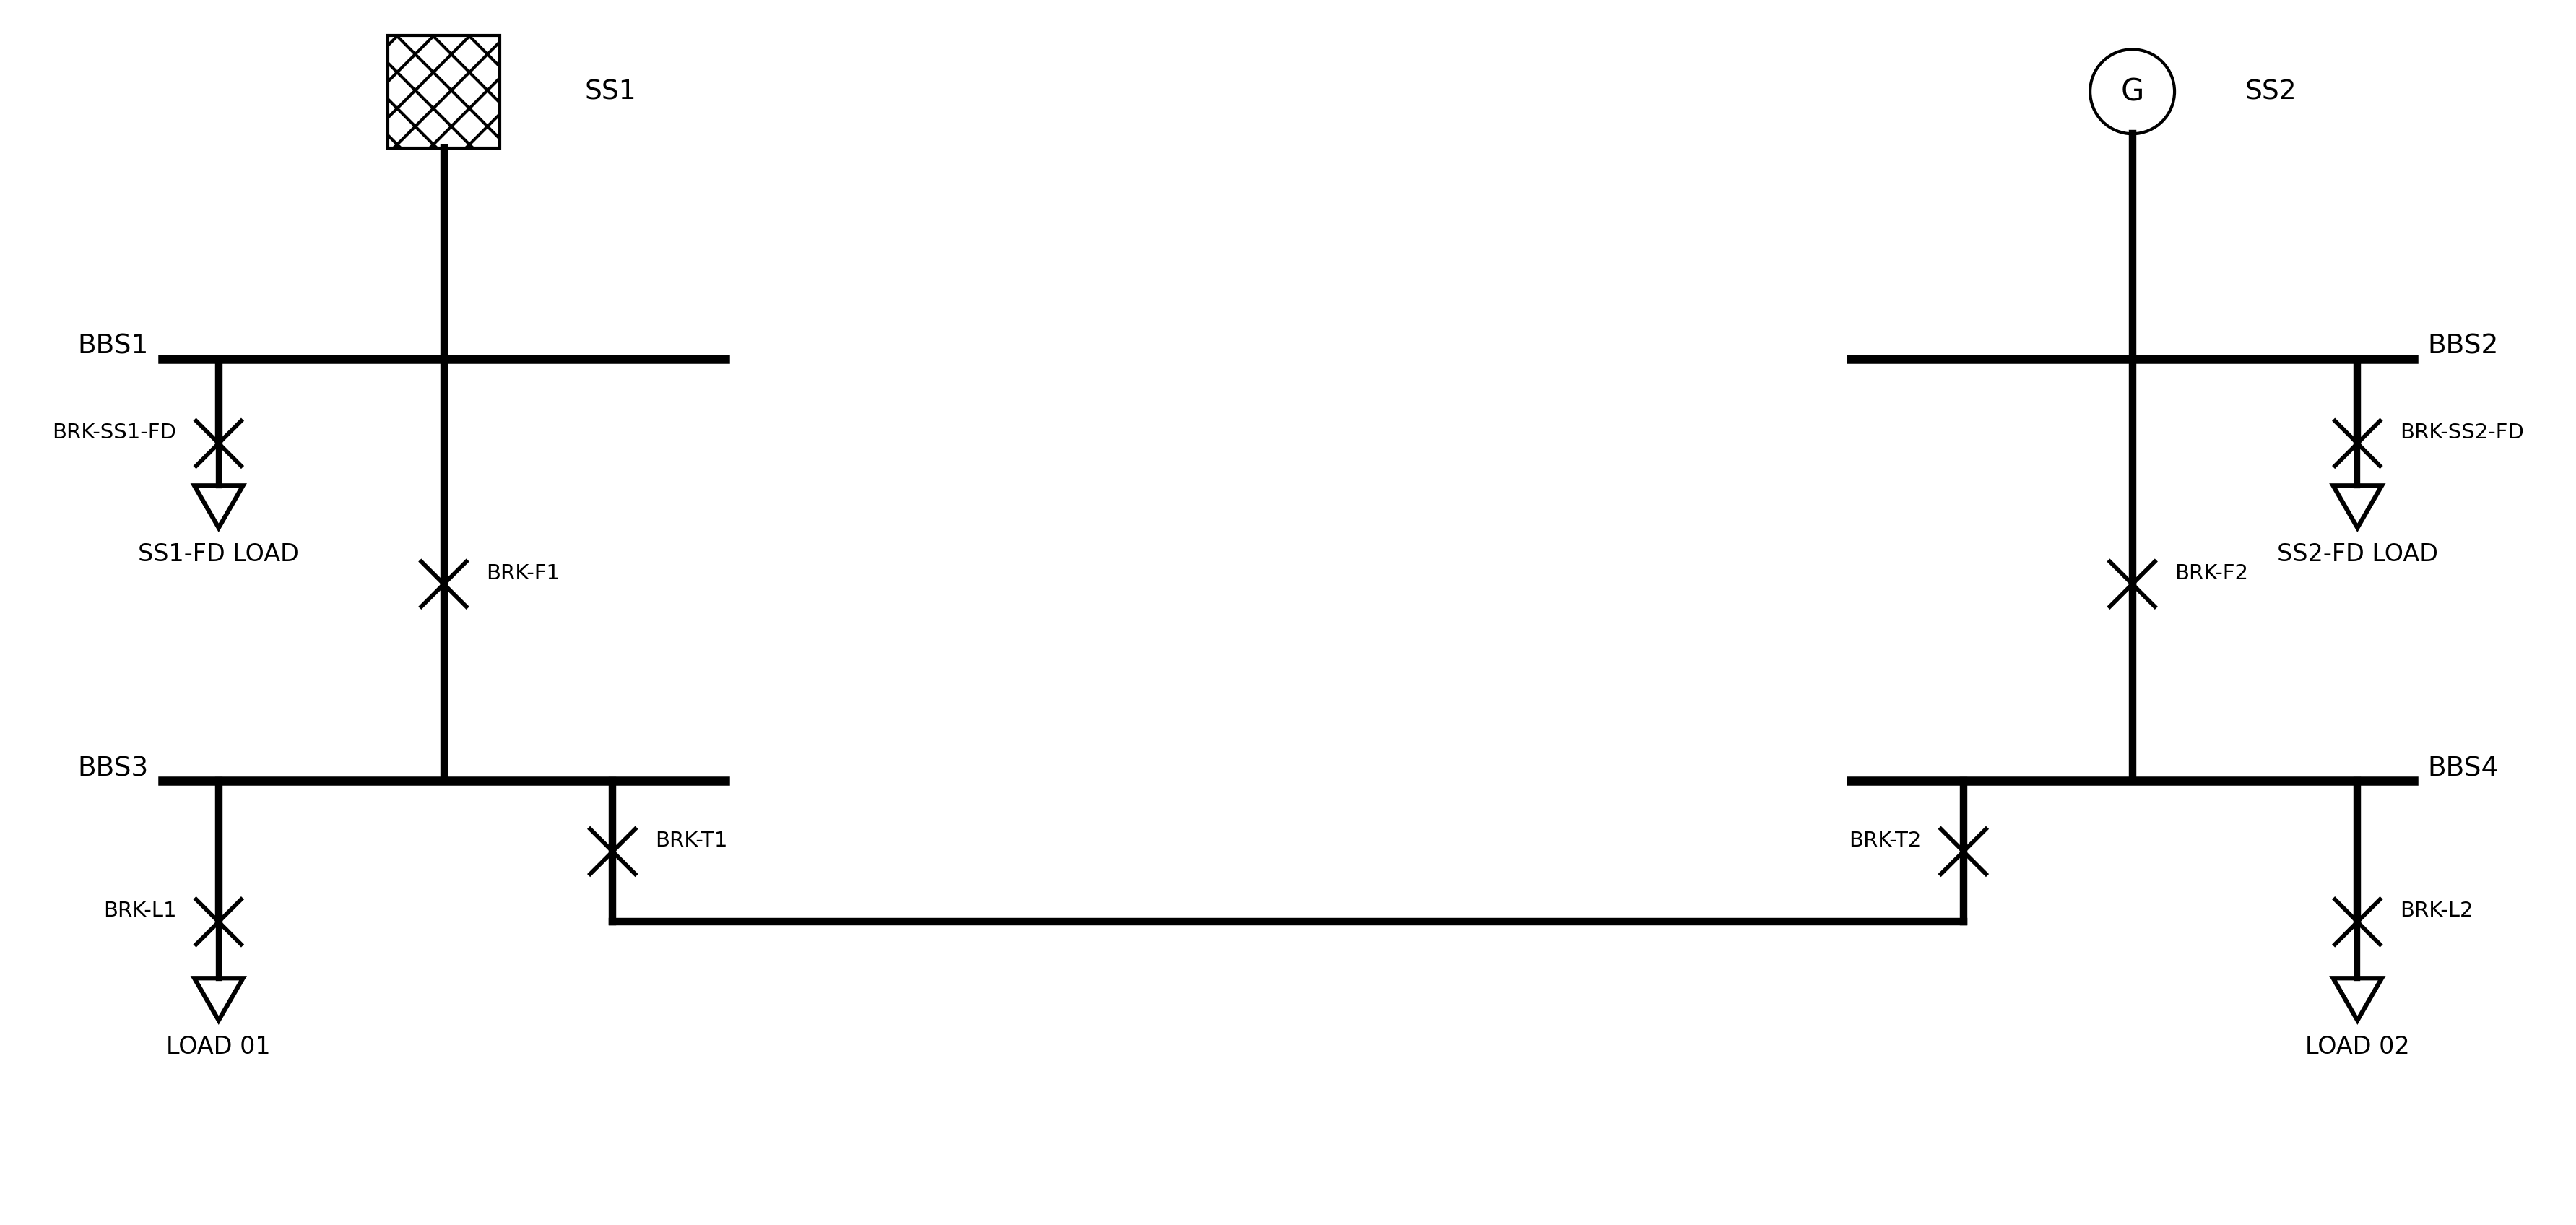

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_finalized_diagram_with_adjusted_labels():
    fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

    size = 0.08

    y_top = 5
    y_bus_top = 4.0
    y_intermediate = 3.2
    y_bus_bottom = 2.5
    y_load_hinge = 2.0
    y_load_tip = 1.75
    y_fd_hinge = 3.7
    y_fd_tip = 3.5
    y_tie_bottom = y_bus_bottom - 0.5

    x_bbs1 = 3
    x_bbs2 = 9
    x_bbs3 = 3
    x_bbs4 = 9

    def draw_breaker(x, y, label, align='left', x_offset=0.15, y_offset=0.02):
        ax.plot([x - size, x + size], [y - size, y + size], color='black', linewidth=1.4)
        ax.plot([x - size, x + size], [y + size, y - size], color='black', linewidth=1.4)
        ha = 'left' if align == 'left' else 'right'
        offset = x_offset if align == 'left' else -x_offset
        ax.text(x + offset, y + y_offset, label, fontsize=7, ha=ha)

    def draw_load(x, y_hinge, y_tip, label):
        ax.plot([x, x], [y_hinge, y_tip + 0.05], color='black', linewidth=2)
        ax.add_patch(patches.RegularPolygon((x, y_tip), numVertices=3, radius=0.1,
                                            orientation=3.1416, edgecolor='black',
                                            facecolor='white', linewidth=1.5))
        ax.text(x, y_tip - 0.15, label, ha='center', va='top', fontsize=8)

    # === Top Sources ===
    ax.add_patch(plt.Rectangle((x_bbs1 - 0.2, y_top - 0.25), 0.4, 0.4, edgecolor='black', facecolor='white', hatch='xx'))
    ax.text(x_bbs1 + 0.5, y_top - 0.05, "SS1", ha='left', va='center', fontsize=9)
    ax.plot([x_bbs1, x_bbs1], [y_top - 0.25, y_bus_top], color='black', linewidth=2.5)

    ax.add_patch(patches.Circle((x_bbs2, y_top - 0.05), radius=0.15, edgecolor='black', facecolor='white'))
    ax.text(x_bbs2 + 0.4, y_top - 0.05, "SS2", ha='left', va='center', fontsize=9)
    ax.text(x_bbs2, y_top - 0.05, "G", ha='center', va='center', fontsize=10)
    ax.plot([x_bbs2, x_bbs2], [y_top - 0.2, y_bus_top], color='black', linewidth=2.5)

    # === BBS1 and BBS2 ===
    ax.plot([x_bbs1 - 1, x_bbs1 + 1], [y_bus_top, y_bus_top], color='black', linewidth=3)
    ax.text(x_bbs1 - 1.05, y_bus_top, "BBS1", ha='right', va='bottom', fontsize=9)
    ax.plot([x_bbs2 - 1, x_bbs2 + 1], [y_bus_top, y_bus_top], color='black', linewidth=3)
    ax.text(x_bbs2 + 1.05, y_bus_top, "BBS2", ha='left', va='bottom', fontsize=9)

    # === Loads off BBS1 and BBS2 ===
    x_ss1_fd = x_bbs1 - 0.8
    ax.plot([x_ss1_fd, x_ss1_fd], [y_bus_top, y_fd_hinge], color='black', linewidth=2.5)
    draw_breaker(x_ss1_fd, y_fd_hinge, "BRK-SS1-FD", align='right')
    draw_load(x_ss1_fd, y_fd_hinge, y_fd_tip, "SS1-FD LOAD")

    x_ss2_fd = x_bbs2 + 0.8
    ax.plot([x_ss2_fd, x_ss2_fd], [y_bus_top, y_fd_hinge], color='black', linewidth=2.5)
    draw_breaker(x_ss2_fd, y_fd_hinge, "BRK-SS2-FD", align='left')
    draw_load(x_ss2_fd, y_fd_hinge, y_fd_tip, "SS2-FD LOAD")

    # === Feeds from BBS1/BBS2 to BBS3/BBS4 ===
    ax.plot([x_bbs1, x_bbs1], [y_bus_top, y_intermediate], color='black', linewidth=2.5)
    draw_breaker(x_bbs1, y_intermediate, "BRK-F1", align='left')
    ax.plot([x_bbs1, x_bbs1], [y_intermediate, y_bus_bottom], color='black', linewidth=2.5)

    ax.plot([x_bbs2, x_bbs2], [y_bus_top, y_intermediate], color='black', linewidth=2.5)
    draw_breaker(x_bbs2, y_intermediate, "BRK-F2", align='left')
    ax.plot([x_bbs2, x_bbs2], [y_intermediate, y_bus_bottom], color='black', linewidth=2.5)

    # === BBS3 and BBS4 ===
    ax.plot([x_bbs3 - 1, x_bbs3 + 1], [y_bus_bottom, y_bus_bottom], color='black', linewidth=3)
    ax.text(x_bbs3 - 1.05, y_bus_bottom, "BBS3", ha='right', va='bottom', fontsize=9)
    ax.plot([x_bbs4 - 1, x_bbs4 + 1], [y_bus_bottom, y_bus_bottom], color='black', linewidth=3)
    ax.text(x_bbs4 + 1.05, y_bus_bottom, "BBS4", ha='left', va='bottom', fontsize=9)

    # === Tie Line (U-shaped downward) ===
    x_bbs3_tie = x_bbs3 + 0.6
    x_bbs4_tie = x_bbs4 - 0.6
    y_bbs3_tie_mid = (y_bus_bottom + y_tie_bottom) / 2
    y_bbs4_tie_mid = (y_bus_bottom + y_tie_bottom) / 2

    ax.plot([x_bbs3_tie, x_bbs3_tie], [y_bus_bottom, y_tie_bottom], color='black', linewidth=2.5)
    draw_breaker(x_bbs3_tie, y_bbs3_tie_mid, "BRK-T1", align='left')

    ax.plot([x_bbs4_tie, x_bbs4_tie], [y_bus_bottom, y_tie_bottom], color='black', linewidth=2.5)
    draw_breaker(x_bbs4_tie, y_bbs4_tie_mid, "BRK-T2", align='right')

    ax.plot([x_bbs3_tie, x_bbs4_tie], [y_tie_bottom, y_tie_bottom], color='black', linewidth=2.5)

    # === LOAD 01 and 02 ===
    x_bbs3_load = x_bbs3 - 0.8
    ax.plot([x_bbs3_load, x_bbs3_load], [y_bus_bottom, y_load_hinge], color='black', linewidth=2.5)
    draw_breaker(x_bbs3_load, y_load_hinge, "BRK-L1", align='right')
    draw_load(x_bbs3_load, y_load_hinge, y_load_tip, "LOAD 01")

    x_bbs4_load = x_bbs4 + 0.8
    ax.plot([x_bbs4_load, x_bbs4_load], [y_bus_bottom, y_load_hinge], color='black', linewidth=2.5)
    draw_breaker(x_bbs4_load, y_load_hinge, "BRK-L2", align='left')
    draw_load(x_bbs4_load, y_load_hinge, y_load_tip, "LOAD 02")

    ax.set_xlim(1.5, 10.5)
    ax.set_ylim(1.0, 5.2)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

draw_finalized_diagram_with_adjusted_labels()